# **Analysis of Configurations**

In [38]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [59]:
dirs = ['./config_testing/sparse/', './config_testing/medium/', './config_testing/noisy/']
dfs = []
column_order = ['Test Video', 'Model', 'Width (px)', 'Height (px)', 'Frame Rate (fps)']

for dir in dirs:
    file_list = os.listdir(dir)

    for file in file_list:
        file_path = os.path.join(dir, file)

        if '.txt' == os.path.splitext(file_path)[1]:
            df = pd.read_csv(file_path, \
                             sep=': ', header=None, engine='python').set_index(0)
            df = df.transpose().reset_index(drop=True)
            
            config_params = file.split('_')
            
            # Setting columns based on params
            df['Test Video'], df['Model'], df['Width (px)'], df['Height (px)'], df['Frame Rate (fps)'] = \
            config_params[0], config_params[1], config_params[2], config_params[3], config_params[4]
            
            # Add columns
            df['Resolution (px)'] = int(df['Width (px)']) * int(df['Height (px)'])
            df['Resolution (1000s of px)'] = df['Resolution (px)'] / 1000
            df['Energy (1000s of J)'] = df['energy'] / 1000

            # Reordering columns
            df = df.reindex(columns=column_order+[x for x in df.columns if x not in column_order])

            dfs.append(df)

config_data = pd.concat(dfs).reset_index(drop=True)

In [92]:
config_data

,Test Video,Model,Width (px),Height (px),Frame Rate (fps),frames,runtime (inference),average time per frame,runtime (total),energy,avg power,mAP,Resolution (px),Resolution (1000s of px),Energy (1000s of J)
0,sparse,yolov5n,1280,720,25fps,250.0,500.380793,2.001523,518.949597,2804.991580,5.405133,0.145058,921600,921.600,2.804992
1,sparse,yolov5n,1536,864,25fps,250.0,662.711819,2.650847,681.461129,3752.266344,5.506207,0.081905,1327104,1327.104,3.752266
2,sparse,yolov5n,1792,1008,25fps,250.0,904.331056,3.617324,923.227084,4879.915682,5.285715,0.078847,1806336,1806.336,4.879916
3,sparse,yolov5n,640,360,25fps,250.0,148.813620,0.595254,167.164615,880.585940,5.267777,0.040086,230400,230.400,0.880586
4,sparse,yolov5n,960,540,25fps,250.0,295.154678,1.180619,314.041657,1686.142758,5.369169,0.060430,518400,518.400,1.686143
5,medium,yolov5n,1280,720,25fps,250.0,505.562711,2.022251,524.999192,2897.454566,5.518970,0.207706,921600,921.600,2.897455
6,medium,yolov5n,640,360,25fps,250.0,145.295367,0.581181,164.219794,855.257624,5.208006,0.116391,230400,230.400,0.855258
7,medium,yolov5n,960,540,25fps,250.0,297.634213,1.190537,319.021008,1696.312280,5.317243,0.144439,518400,518.400,1.696312
8,noisy,yolov5n,1280,720,25fps,250.0,490.770661,1.963083,509.610191,2840.652493,5.574167,0.023082,921600,921.600,2.840652
9,noisy,yolov5n,1792,1008,25fps,250.0,910.349727,3.641399,937.145675,4855.593325,5.181258,0.023223,1806336,1806.336,4.855593


In [86]:
def plot_with_best_fit(df, x_name, y_name, vid_level=None):
    
    # If video level was specified, filter df to just those rows
    if vid_level in ['sparse', 'medium', 'noisy']:
        df = df[df['Test Video'] == vid_level]
    
    # Create scatter plot
    sns.regplot(x=x_name, y=y_name, data=df, scatter_kws={'s': 50})

    # Calculate the regression equation using numpy's polyfit function
    coefficients = np.polyfit(df[x_name], df[y_name], deg=1)
    slope = coefficients[0]
    intercept = coefficients[1]

    # Add the regression equation as an annotation on the plot
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(equation, xy=(0.6, 0.9), xycoords='axes fraction', fontsize=12)

    # Add labels and title
    plt.xlabel(x_name)
    plt.ylabel(y_name)




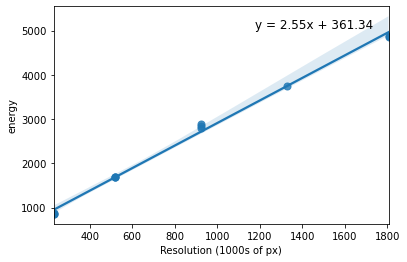

In [73]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy')

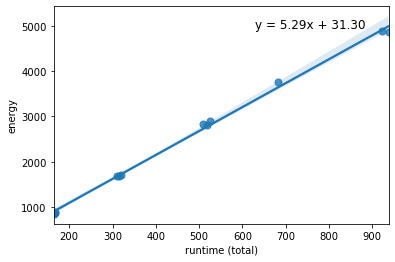

In [70]:
plot_with_best_fit(config_data, 'runtime (total)', 'energy')

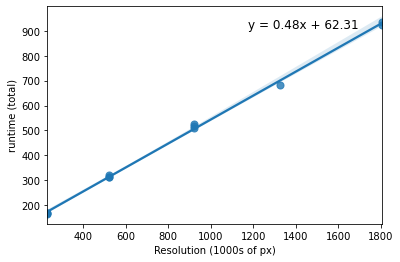

In [71]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'runtime (total)')

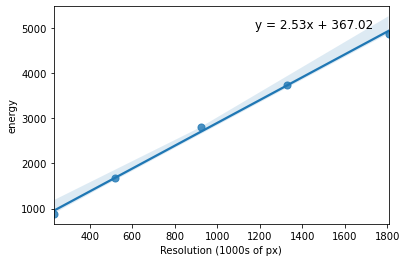

In [88]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy', 'sparse')

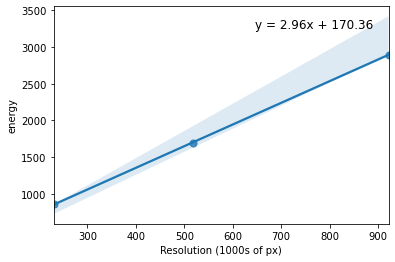

In [89]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy', 'medium')

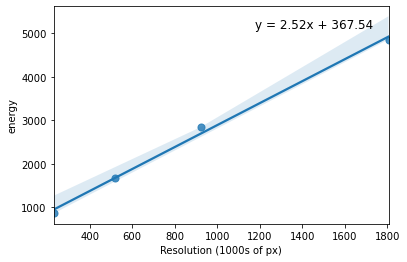

In [90]:
plot_with_best_fit(config_data, 'Resolution (1000s of px)', 'energy', 'noisy')